<h1>Logistic regression</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
sns.set_style('whitegrid')

In [187]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [3]:
(train_df.head(), test_df.head())

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

<AxesSubplot:>

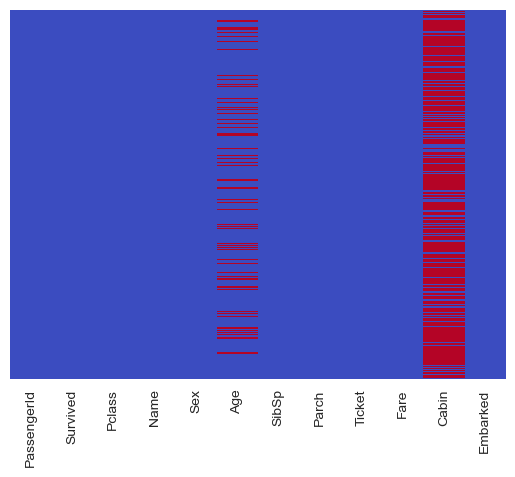

In [7]:
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')

<AxesSubplot:xlabel='Survived', ylabel='count'>

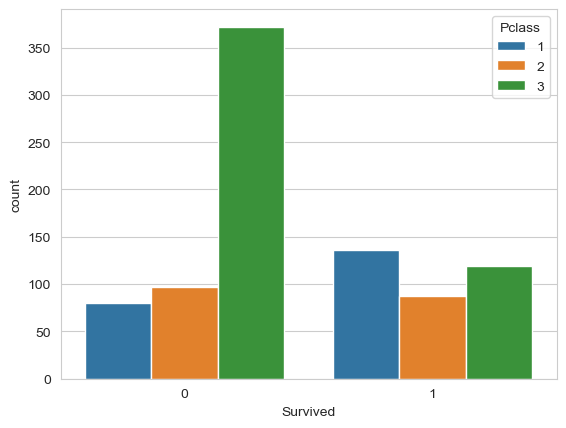

In [14]:
# sns.countplot(data=train_df, x='Survived', hue='Sex', palette='RdBu_r')
sns.countplot(data=train_df, x='Survived', hue='Pclass')

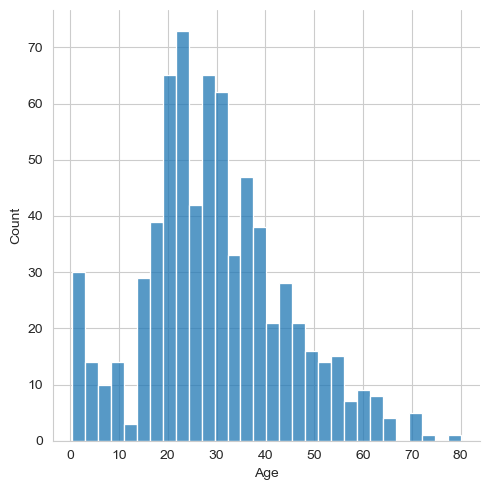

In [16]:
sns.displot(train_df['Age'].dropna(), bins=30, kde=False)

In [19]:
train_df[train_df['Age'] > 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [20]:
import cufflinks as cf
cf.go_offline()

In [21]:
train_df['Age'].iplot(kind='hist', bins=40)

In [188]:
def impute_age(columns):
    age, p_class = columns[0 : 2]
    if pd.isnull(age):
        age = train_df[train_df['Pclass'] == p_class]['Age'].mean()
    return age

In [189]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

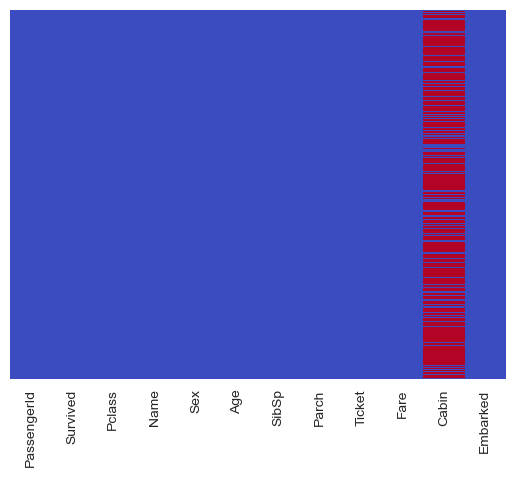

In [190]:
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')

In [191]:
train_df.drop('Cabin', axis=1, inplace=True)

In [192]:
train_df.dropna(inplace=True)

<AxesSubplot:>

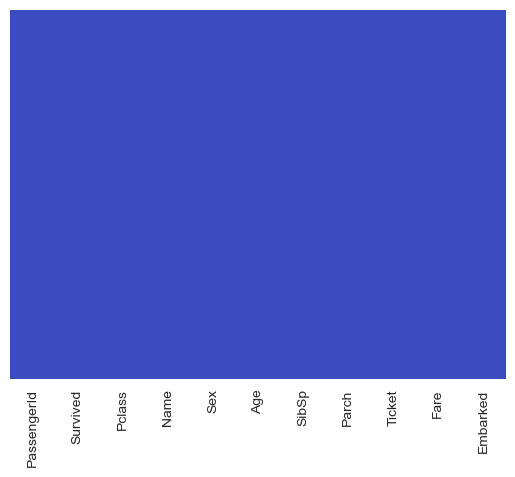

In [193]:
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap='coolwarm')

In [194]:
train_df['Sex'] = pd.get_dummies(train_df['Sex'], drop_first=True)

embark = pd.get_dummies(train_df['Embarked'], drop_first=True)
train_df = pd.concat([train_df, embark], axis=1)

In [195]:
train_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis=1, inplace=True)

In [196]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0


In [197]:
y = train_df['Survived']
X = train_df.drop(['Survived'], axis=1)

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [200]:
lr_model = LogisticRegression()

In [201]:
lr_model.fit(X_train, y_train)

/Users/jakubgwozdz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [202]:
predicted = lr_model.predict(X_test)

In [210]:
from sklearn.metrics import classification_report, confusion_matrix

In [208]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       179
           1       0.65      0.68      0.67        88

    accuracy                           0.78       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.78      0.78      0.78       267



In [211]:
print(confusion_matrix(predicted, y_test))

[[147  32]
 [ 28  60]]
